In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline 

In [2]:
train=pd.read_csv('train_part_1_v2.csv.gz',compression='gzip')
train_=pd.read_csv('train_part_2_v2.csv.gz',compression='gzip')

In [3]:
final_train = pd.concat([train, train_], axis=0)

label, integer in {0,1} — you need to predict it. 0 is background (pions and protons), 1 is signal (muons).
    1. particle_type, integer in {0,1,2} — type of the particle. 0 — pion, 1 — muon, 2 — proton. Available only for the training dataset.
    2. weight, float — example weight, used in both training and evaluation. Product of sWeight and kinWeight.
    3. sWeight, float — a component of the example weight that accounts for uncertainty in labeling.
    4. kinWeight, float > 0 — a component of the example weight that equalizes kinematic observables between signal and background.
    5. id, integer — this is an identiﬁcation field of the example.
    6. Lextra_{X,Y,Z}[N], float — coordinates of the track extrapolation intersection with N-th station.
    7. Mextra_{X,Y,Z}2[N], float — multiple scattering uncertainty for squared {X, Y, Z} coordinate of the track extrapolation.
    8. MatchedHit_{X,Y,Z}[N], float — coordinates of the hit in the N-th station that a physics-based tracking algorithm associated with the track.
    9. MatchedHit_TYPE[N], categorical in {1, 2} — whether the matched hit is crossed. It is a technical field. 1 mean uncrossed, 2 means crossed.
    10. MatchedHit_T[N], integer in [1, 20] — timing of the matched hit.
    11. MatchedHit_D{X,Y,Z}[N], float > 0 — uncertainty of the matched hit coordinates.
    12. MatchedHit_DT[N], integer — delta time for the matched hit in the N-th station.
    13. FOI_hits_N, integer — number of hits inside a physics-deﬁned cone around the track (aka Field Of Interest, FOI).
    14. FOI_hits_{,D}{X,Y,Z,T}, array of float of size FOI_hits_N — same as MatchedHit{,D}{X,Y,Z,T}, per hit.
    15. FOI_hits_S, integer in {0, 3} — stations of the FOI hits. Numbering begins with 0.
    16. ncl[N], integer — number of clusters in the N-th station (high-level variable).
    17. avg_cs[N], float ≥ 1 — average cluster size in the N-th station (high-level variable).
    18. ndof, integer in {4, 6, 8} — number of degrees of freedom used in χ2 computation, a function of momentum.
    19. NShared, integer ≥ 0 — number of closest hits shared with the neighbouring tracks.
-9999 is used for missing values.

In [15]:
final_train.shape

(5445705, 80)

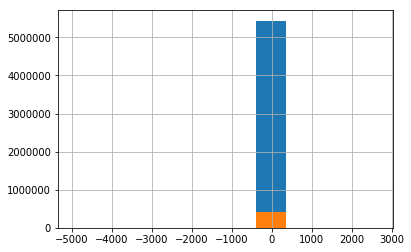

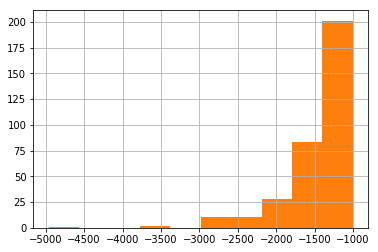

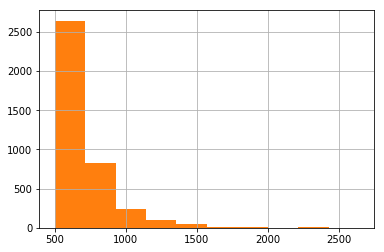

In [33]:
final_train.weight.hist()
final_train.weight[final_train.label==0].hist()
plt.show()
final_train.weight[final_train.weight<-1000].hist()
final_train.weight[(final_train.weight<-1000)&(final_train.label==0)].hist()
plt.show()
final_train.weight[final_train.weight>500].hist()
final_train.weight[(final_train.weight>500)&(final_train.label==0)].hist()
plt.show()

In [5]:
final_train.columns

Index(['id', 'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'L

In [6]:
final_train['particle_type'].value_counts()

1    5024487
0     253629
2     167589
Name: particle_type, dtype: int64

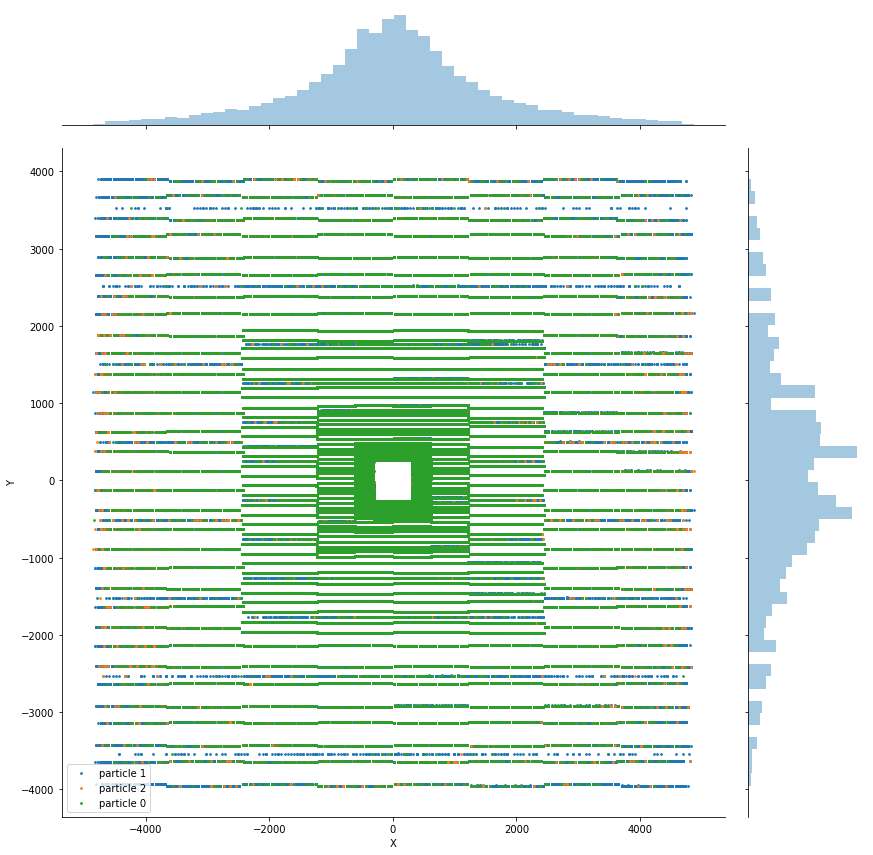

In [8]:
g = sns.jointplot(final_train['MatchedHit_X[0]'], final_train['MatchedHit_Y[0]'],  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

particles = final_train.particle_type.unique()
for particle in particles:
    p = final_train[final_train.particle_type == particle]
    plt.scatter(p['MatchedHit_X[0]'], p['MatchedHit_Y[0]'], s=3, label='particle {}'.format(particle))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

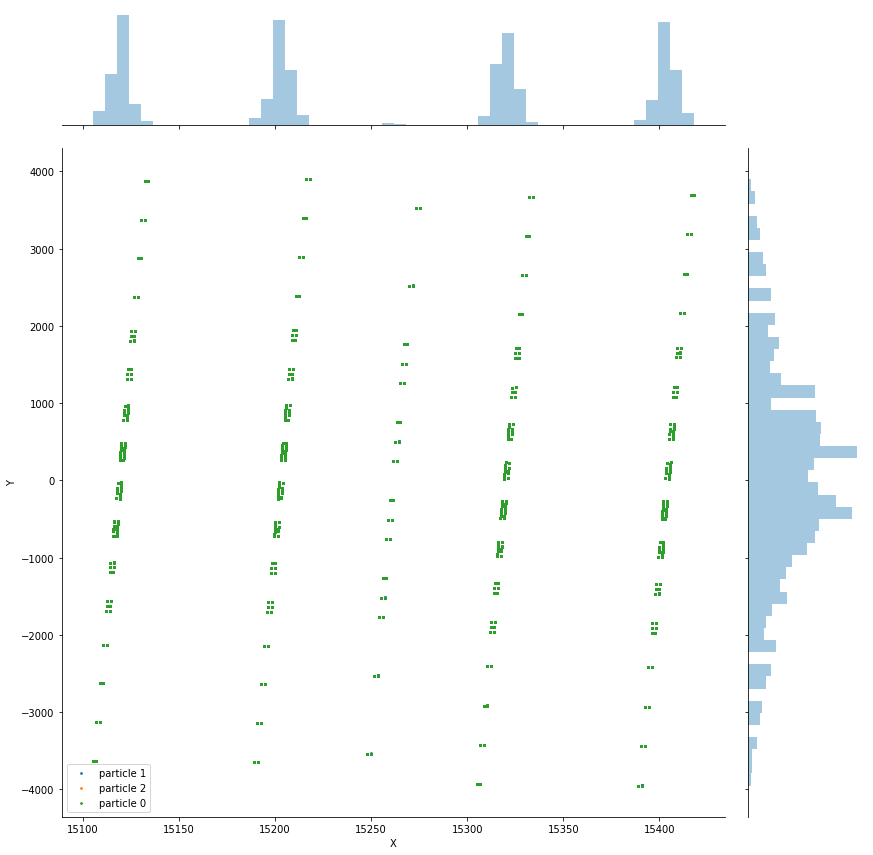

In [9]:
g = sns.jointplot(final_train['MatchedHit_Z[0]'], final_train['MatchedHit_Y[0]'],  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

particles = final_train.particle_type.unique()
for particle in particles:
    p = final_train[final_train.particle_type == particle]
    plt.scatter(p['MatchedHit_Z[0]'], p['MatchedHit_Y[0]'], s=3, label='particle {}'.format(particle))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

/home/whoisafina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


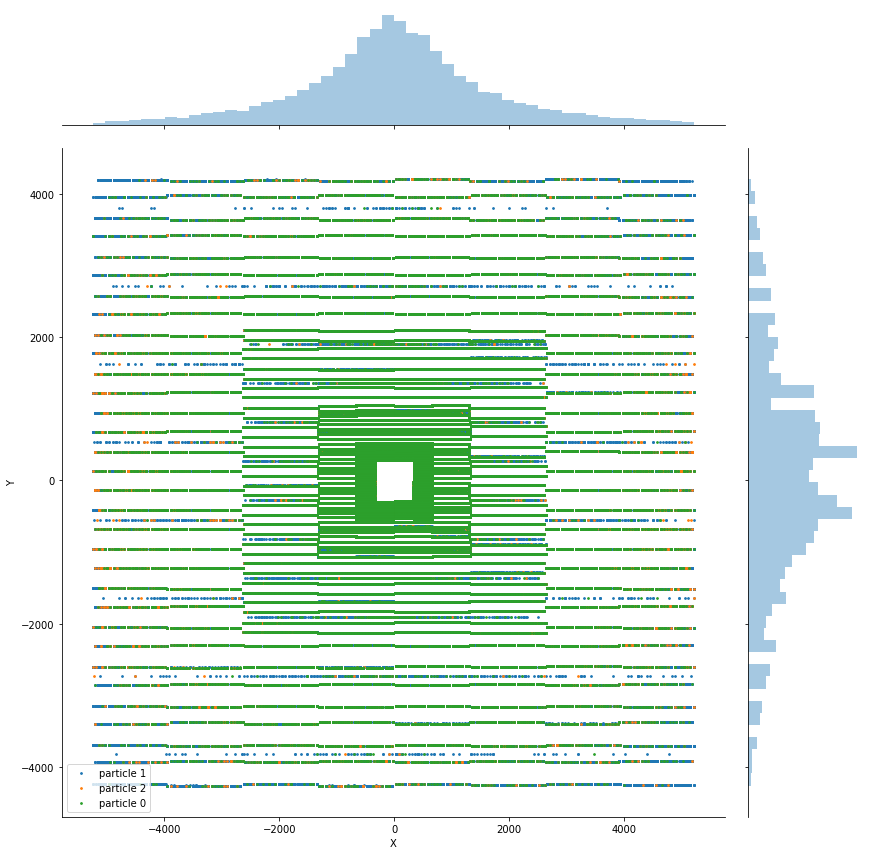

In [4]:
g = sns.jointplot(final_train['MatchedHit_X[1]'], final_train['MatchedHit_Y[1]'],  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

particles = final_train.particle_type.unique()
for particle in particles:
    p = final_train[final_train.particle_type == particle]
    plt.scatter(p['MatchedHit_X[1]'], p['MatchedHit_Y[1]'], s=3, label='particle {}'.format(particle))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

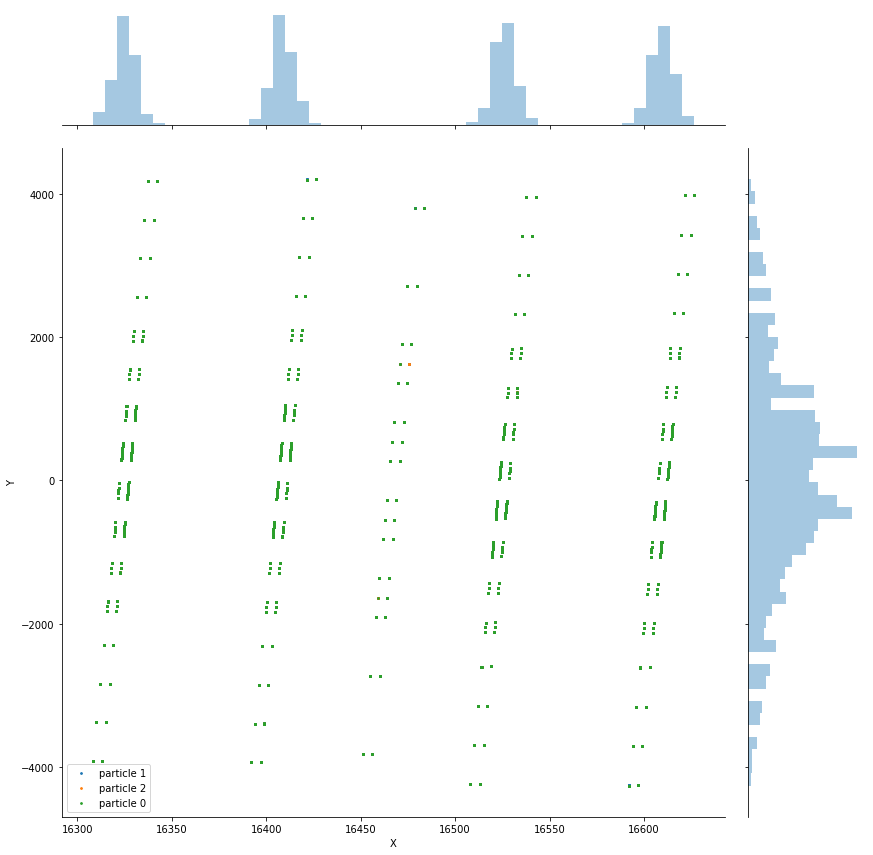

In [7]:
g = sns.jointplot(final_train['MatchedHit_Z[1]'], final_train['MatchedHit_Y[1]'],  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

particles = final_train.particle_type.unique()
for particle in particles:
    p = final_train[final_train.particle_type == particle]
    plt.scatter(p['MatchedHit_Z[1]'], p['MatchedHit_Y[1]'], s=3, label='particle {}'.format(particle))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

/home/whoisafina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


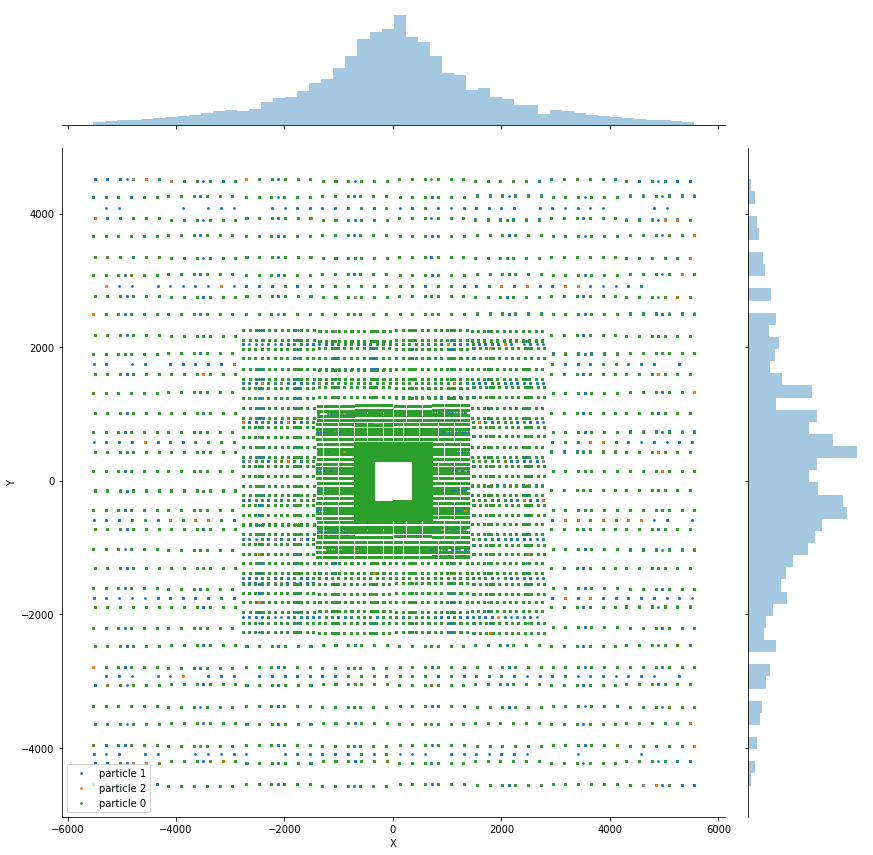

In [17]:
mh=final_train[final_train['MatchedHit_X[2]']>-9999]
g = sns.jointplot(mh['MatchedHit_X[2]'], mh['MatchedHit_Y[2]'],  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

particles = mh.particle_type.unique()
for particle in particles:
    p = mh[mh.particle_type == particle]
    plt.scatter(p['MatchedHit_X[2]'], p['MatchedHit_Y[2]'], s=3, label='particle {}'.format(particle))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

/home/whoisafina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


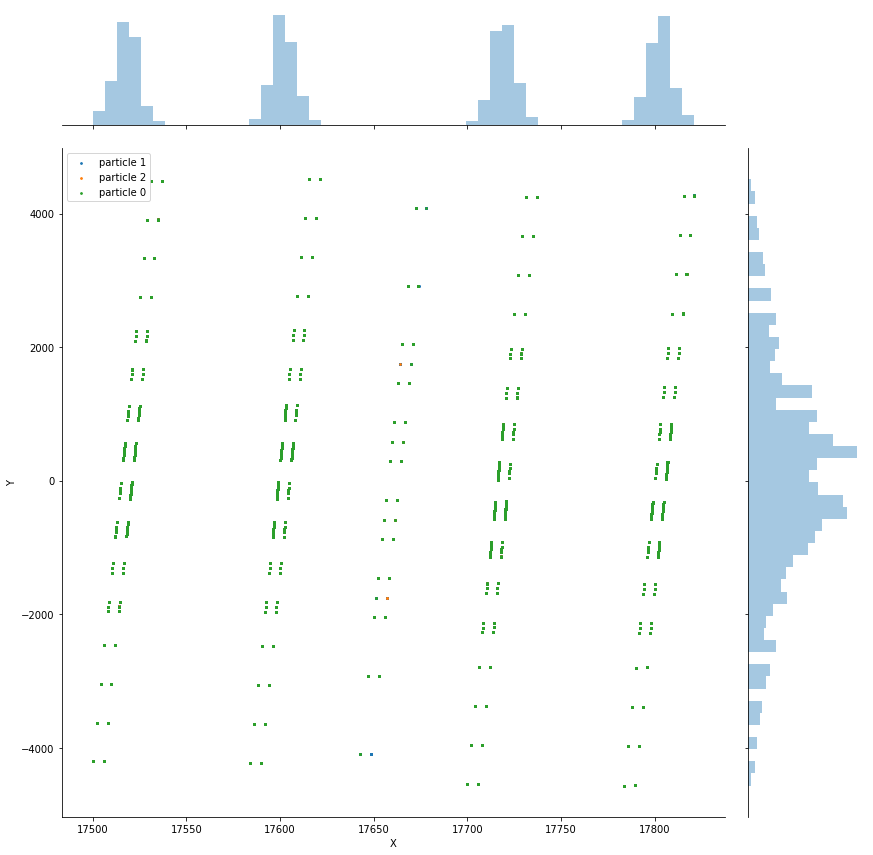

In [19]:
g = sns.jointplot(mh['MatchedHit_Z[2]'], mh['MatchedHit_Y[2]'],  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

particles = mh.particle_type.unique()
for particle in particles:
    p = mh[mh.particle_type == particle]
    plt.scatter(p['MatchedHit_Z[2]'], p['MatchedHit_Y[2]'], s=3, label='particle {}'.format(particle))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

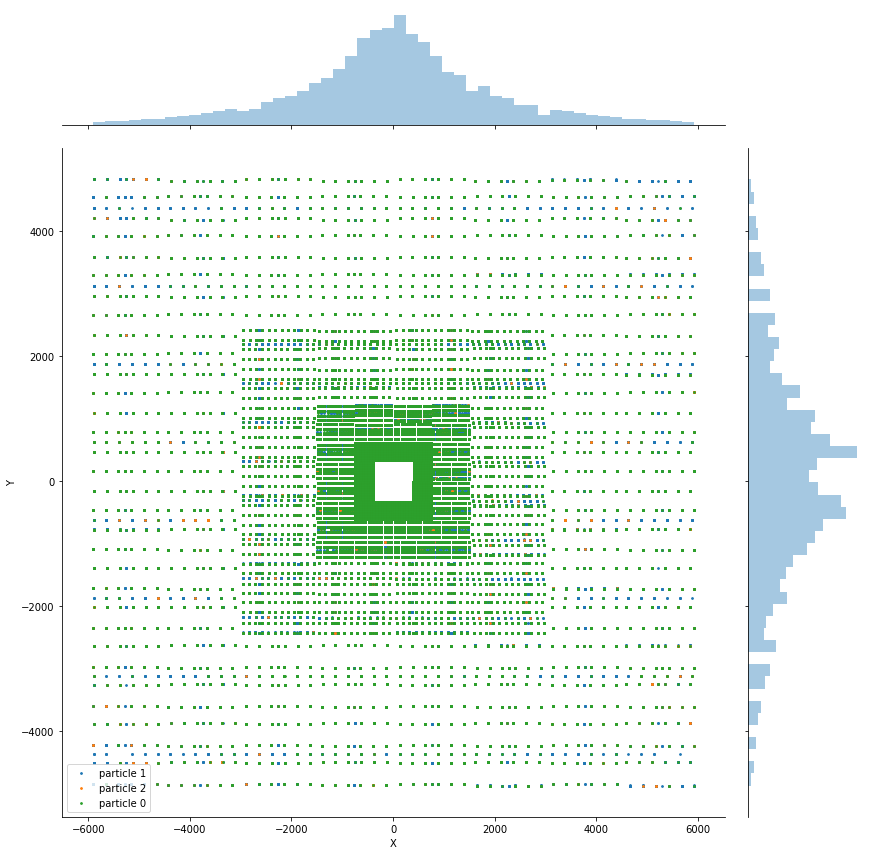

In [20]:
mh=final_train[final_train['MatchedHit_X[3]']>-9999]
g = sns.jointplot(mh['MatchedHit_X[3]'], mh['MatchedHit_Y[3]'],  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

particles = mh.particle_type.unique()
for particle in particles:
    p = mh[mh.particle_type == particle]
    plt.scatter(p['MatchedHit_X[3]'], p['MatchedHit_Y[3]'], s=3, label='particle {}'.format(particle))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

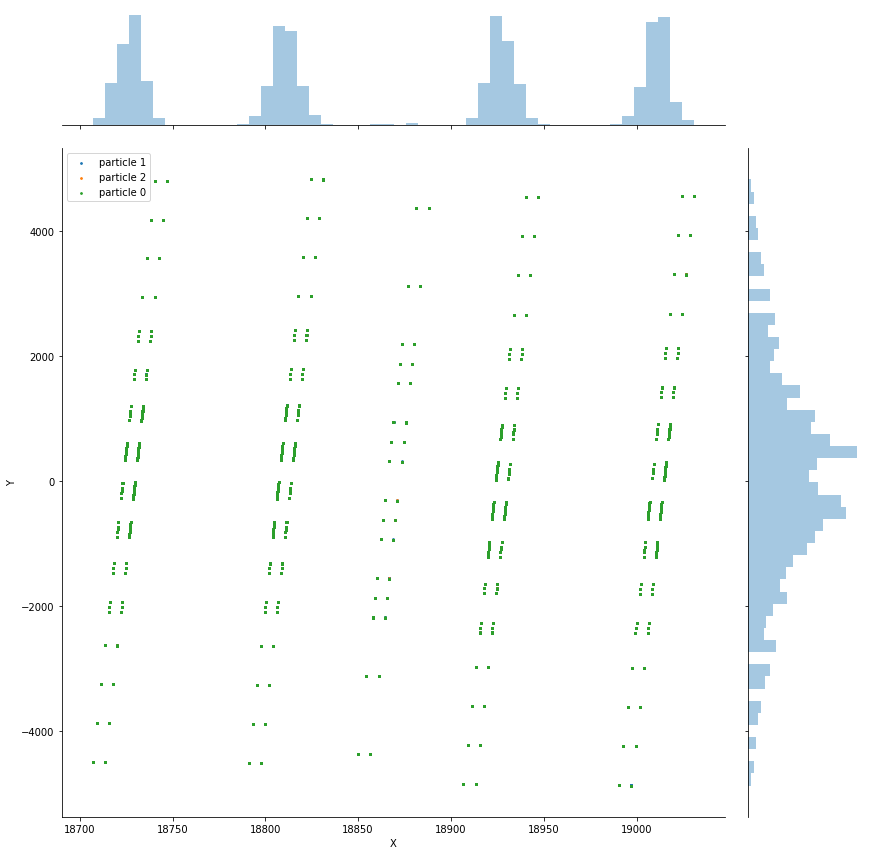

In [21]:
g = sns.jointplot(mh['MatchedHit_Z[3]'], mh['MatchedHit_Y[3]'],  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

particles = mh.particle_type.unique()
for particle in particles:
    p = mh[mh.particle_type == particle]
    plt.scatter(p['MatchedHit_Z[3]'], p['MatchedHit_Y[3]'], s=3, label='particle {}'.format(particle))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

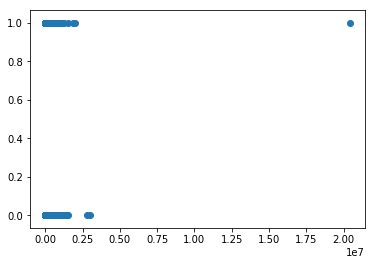

In [41]:
x=final_train.P.values
y=final_train.label.values
plt.scatter(x=x, y=y)

In [35]:
final_train[(final_train.P==final_train.P.max())&(final_train.label==1)]

,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,...,FOI_hits_T,FOI_hits_DT,FOI_hits_S,PT,P,sWeight,particle_type,label,kinWeight,weight
4167557,4167557,49,10,6,5,3.061224,1.4,1.0,1.2,8,...,[ 6 2 4 11 12 12 10 2 10],[ 5 2 3 11 11 12 -1 -1 7],[0 0 0 0 0 1 2 3 3],4.070073e+06,2.040994e+07,-0.418031,1,1,3.77936,-1.579889


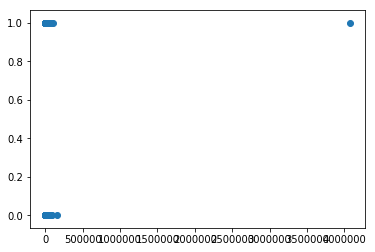

In [42]:
x=final_train.PT.values
y=final_train.label.values
plt.scatter(x=x, y=y)

In [ ]:
final_train[(final_train.PT==final_train.PT.max())&(final_train.label==1)]

In [6]:
final_train.drop(4167557,inplace=True)

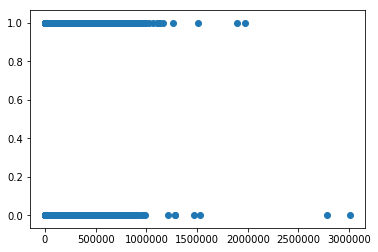

In [37]:
x=final_train.P.values
y=final_train.label.values
plt.scatter(x=x, y=y)

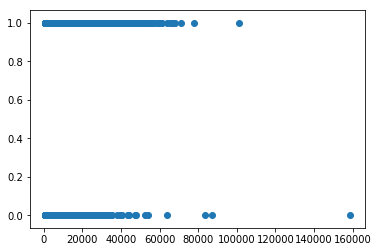

In [38]:
x=final_train.PT.values
y=final_train.label.values
plt.scatter(x=x, y=y)

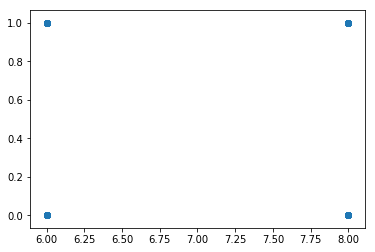

In [22]:
x=final_train.ndof[final_train['MatchedHit_T[2]']<250].values
y=final_train.label[final_train['MatchedHit_T[2]']<250].values
plt.scatter(x=x, y=y)

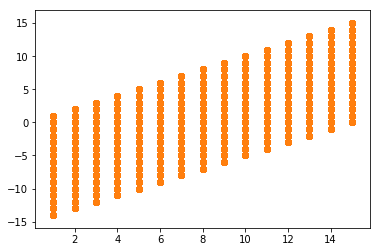

In [7]:
x=final_train['MatchedHit_T[0]'].values
y=final_train['MatchedHit_DT[0]'].values
x1=final_train[final_train.label==1]['MatchedHit_T[0]'].values
y1=final_train[final_train.label==1]['MatchedHit_DT[0]'].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)

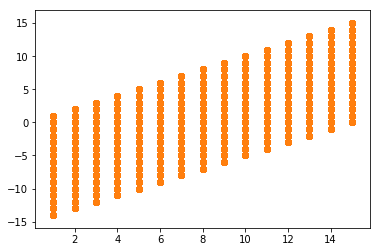

In [8]:
x=final_train['MatchedHit_T[1]'].values
y=final_train['MatchedHit_DT[1]'].values
x1=final_train[final_train.label==1]['MatchedHit_T[1]'].values
y1=final_train[final_train.label==1]['MatchedHit_DT[1]'].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)

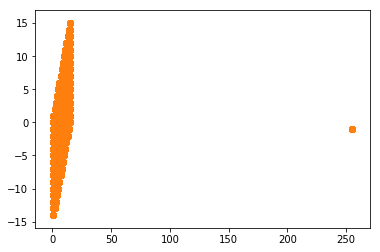

In [9]:
x=final_train['MatchedHit_T[2]'].values
y=final_train['MatchedHit_DT[2]'].values
x1=final_train[final_train.label==1]['MatchedHit_T[2]'].values
y1=final_train[final_train.label==1]['MatchedHit_DT[2]'].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)

In [56]:
print(final_train[final_train['MatchedHit_T[2]']>250].label.value_counts())
final_train[final_train['MatchedHit_T[2]']>250]

1    56073
0    33645
Name: label, dtype: int64


,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,...,FOI_hits_T,FOI_hits_DT,FOI_hits_S,PT,P,sWeight,particle_type,label,kinWeight,weight
11,11,50,8,3,21,1.860000,1.375000,1.000000,1.809524,6,...,[15 1 4 13 3 5 9 2 4 3 2 7 6 4 14],[15 1 4 13 3 5 7 0 4 3 2 7 6 0 4],[0 0 0 0 0 0 0 0 0 1 1 3 3 3 3],1066.161637,8732.558417,0.454074,1,1,1.856460,0.842971
23,23,67,9,6,10,2.179105,2.111111,1.333333,3.600000,4,...,[ 9 11],[-1 0],[0 1],1155.280439,3860.744752,0.853887,1,1,1.856460,1.585207
90,90,87,21,14,11,1.632184,1.761905,1.071428,1.363636,4,...,[ 2 3 14 8 7],[ 2 3 14 8 7],[0 1 1 1 1],923.183170,4294.052121,-0.403385,1,1,1.856460,-0.748868
125,125,58,17,29,20,2.568965,1.529412,1.172414,1.300000,4,...,[ 6 6 12 4],[ 0 -6 6 0],[0 0 0 1],1056.988965,5753.268305,1.177957,1,1,3.000000,3.533871
137,137,13,4,8,13,1.461538,1.000000,1.125000,6.000000,6,...,[ 7 7 5 3 12 12 10 10 9 9],[-4 0 2 0 3 2 1 0 0 -1],[0 0 1 1 3 3 3 3 3 3],962.829424,6297.321213,0.759180,1,1,1.856460,1.409387
287,287,43,9,0,4,2.651163,2.222222,0.000000,1.000000,4,...,[ 6 11 15 9 9 9],[ 0 0 15 -1 2 2],[0 0 0 1 1 1],956.784879,4652.239685,1.153693,0,0,5.673616,6.545613
369,369,57,16,13,13,1.982456,1.562500,1.538462,1.230769,6,...,[4 1 1 6 1],[-1 -1 -1 -2 0],[0 1 1 3 3],937.411500,3967.385893,1.224788,1,1,1.856460,2.273769
386,386,89,46,13,14,2.235955,2.108696,1.692308,1.214286,6,...,[12 10 4 1 7 9],[12 0 4 1 0 -1],[0 0 1 1 3 3],893.624555,5436.902133,-0.406036,1,1,1.856460,-0.753790
442,442,81,9,6,6,2.333333,2.111111,1.500000,1.500000,6,...,[12 3 14],[ 1 3 14],[0 1 3],824.402887,9856.786250,1.056326,2,0,11.232503,11.865185
450,450,17,7,6,12,1.235294,1.000000,1.000000,3.916667,6,...,[ 5 5 2 1 4 10 2 1 15 15 15 1 15 1 2 ...,[ 5 5 2 1 4 10 -12 1 15 15 15 ...,[0 0 0 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3],863.997039,5181.797818,0.032547,1,1,2.806500,0.091344


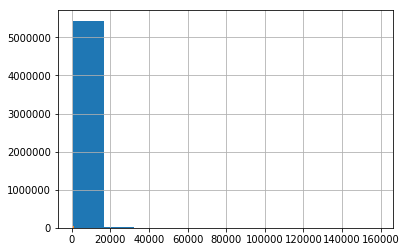

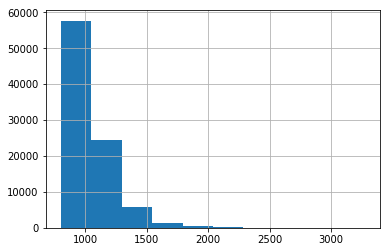

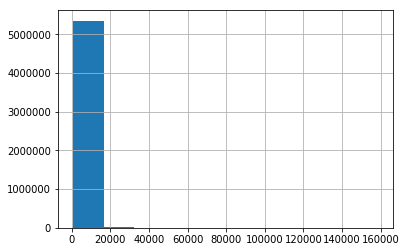

In [17]:
final_train.PT.hist()
final_train.PT[final_train['MatchedHit_T[2]']>250].hist()
plt.show()
final_train.PT[final_train['MatchedHit_T[2]']>250].hist()
plt.show()
final_train.PT[final_train['MatchedHit_T[2]']<250].hist()
plt.show()

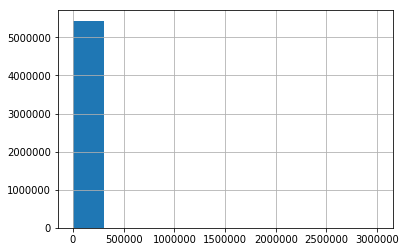

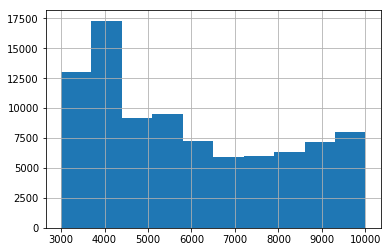

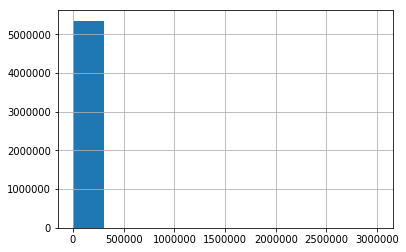

In [18]:
final_train.P.hist()
final_train.P[final_train['MatchedHit_T[2]']>250].hist()
plt.show()
final_train.P[final_train['MatchedHit_T[2]']>250].hist()
plt.show()
final_train.P[final_train['MatchedHit_T[2]']<250].hist()
plt.show()

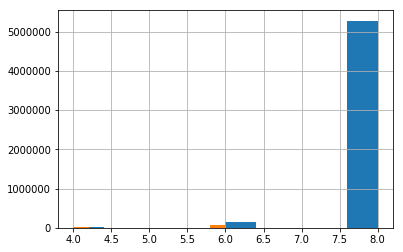

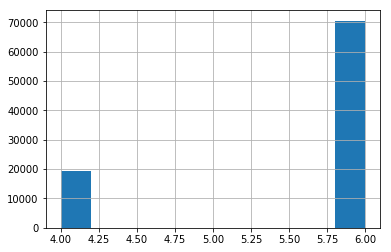

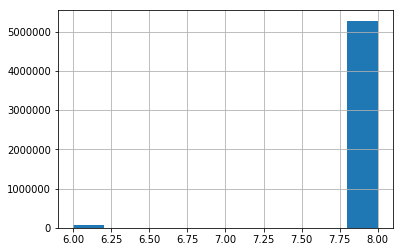

In [19]:
final_train.ndof.hist()
final_train.ndof[final_train['MatchedHit_T[2]']>250].hist()
plt.show()
final_train.ndof[final_train['MatchedHit_T[2]']>250].hist()
plt.show()
final_train.ndof[final_train['MatchedHit_T[2]']<250].hist()
plt.show()

In [6]:
final_train['r1']=np.sqrt(final_train['MatchedHit_X[0]']**2 + final_train['MatchedHit_Y[0]']**2 +
                         final_train['MatchedHit_Z[0]']**2) 

In [7]:
final_train['r2']=np.sqrt((final_train['MatchedHit_X[1]']-final_train['MatchedHit_X[0]'])**2 + 
                    (final_train['MatchedHit_Y[1]']-final_train['MatchedHit_Y[0]'])**2 
                    + (final_train['MatchedHit_Z[1]']-final_train['MatchedHit_Z[0]'])**2) 

In [8]:
final_train['r3']=np.sqrt((final_train['MatchedHit_X[2]']-final_train['MatchedHit_X[1]'])**2 + 
                    (final_train['MatchedHit_Y[2]']-final_train['MatchedHit_Y[1]'])**2 + 
                    (final_train['MatchedHit_Z[2]']-final_train['MatchedHit_Z[1]'])**2)

In [9]:
final_train['r4']=np.sqrt((final_train['MatchedHit_X[3]']-final_train['MatchedHit_X[2]'])**2 + 
                    (final_train['MatchedHit_Y[3]']-final_train['MatchedHit_Y[2]'])**2 + 
                    (final_train['MatchedHit_Z[3]']-final_train['MatchedHit_Z[2]'])**2)

In [10]:
final_train['v1']=final_train['r1']/final_train['MatchedHit_T[0]']
final_train['v2']=final_train['r2']/final_train['MatchedHit_T[1]']
final_train['v3']=final_train['r3']/final_train['MatchedHit_T[2]']
final_train['v4']=final_train['r4']/final_train['MatchedHit_T[3]']

In [11]:
final_train['v1_inv']=1/(final_train['v1']**2)
final_train['v2_inv']=1/(final_train['v2']**2)
final_train['v3_inv']=1/(final_train['v3']**2)
final_train['v4_inv']=1/(final_train['v4']**2)

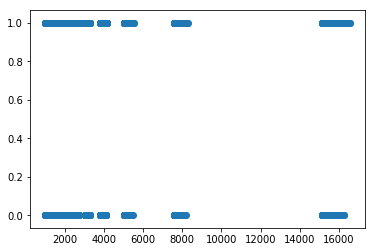

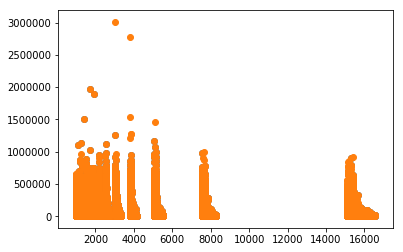

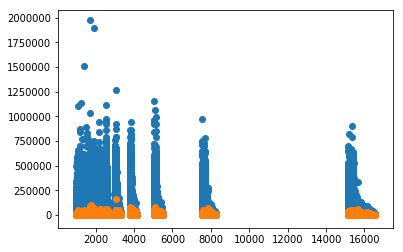

In [80]:
x=final_train['v1'].values
y=final_train.label.values
plt.scatter(x=x, y=y)
plt.show()
x=final_train.v1.values
y=final_train.P.values
x1=final_train.v1[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()
x=final_train.v1.values
y=final_train.PT.values
x1=final_train.v1[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()

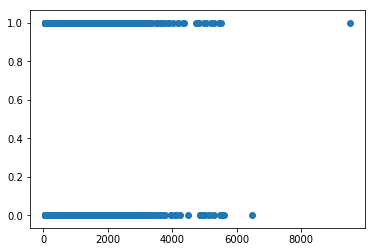

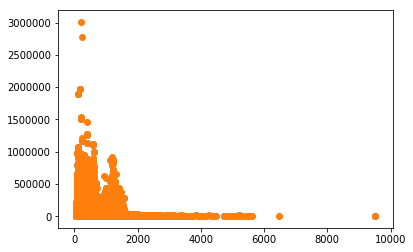

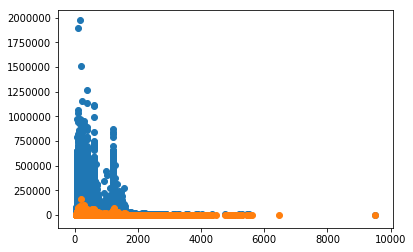

In [81]:
x=final_train['v2'].values
y=final_train.label.values
plt.scatter(x=x, y=y)
plt.show()
x=final_train.v2.values
y=final_train.P.values
x1=final_train.v2[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()
x=final_train.v2.values
y=final_train.PT.values
x1=final_train.v2[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()

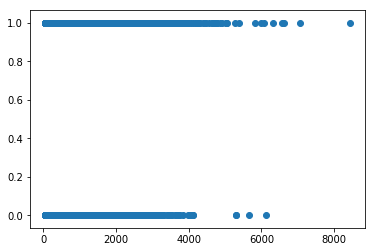

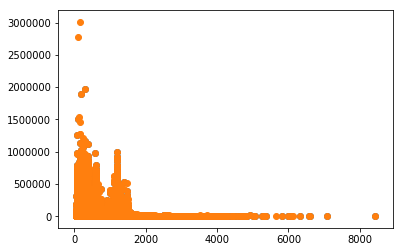

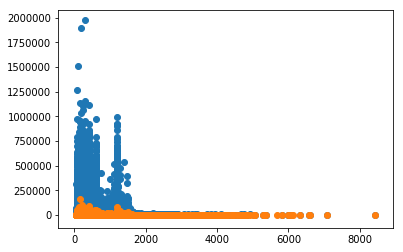

In [82]:
x=final_train['v3'].values
y=final_train.label.values
plt.scatter(x=x, y=y)
plt.show()
x=final_train.v3.values
y=final_train.P.values
x1=final_train.v3[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()
x=final_train.v3.values
y=final_train.PT.values
x1=final_train.v3[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()

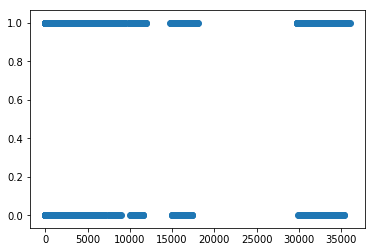

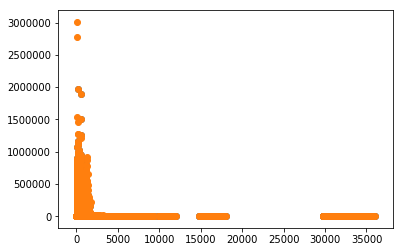

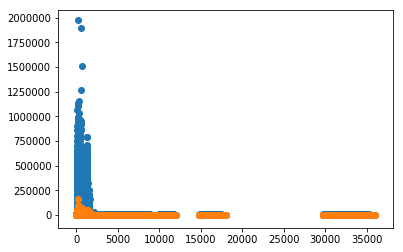

In [83]:
x=final_train['v4'].values
y=final_train.label.values
plt.scatter(x=x, y=y)
plt.show()
x=final_train.v4.values
y=final_train.P.values
x1=final_train.v4[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()
x=final_train.v4.values
y=final_train.PT.values
x1=final_train.v4[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()

In [12]:
for i in range(4):
    final_train[f'mextr_size_{i}']=final_train[f'Mextra_DX2[{i}]']*final_train[f'Mextra_DY2[{i}]']

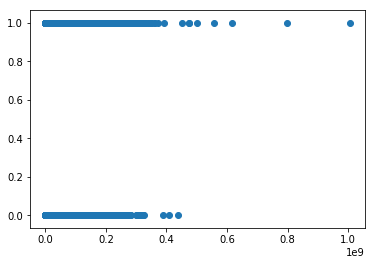

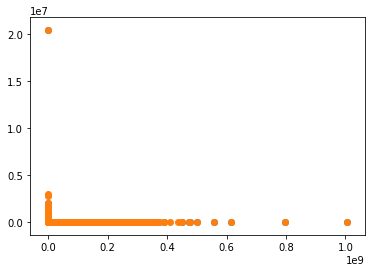

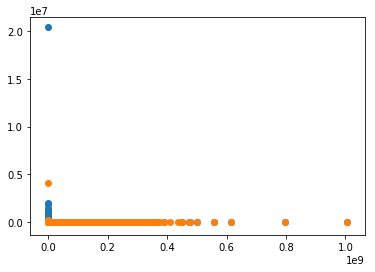

In [13]:
x=final_train.mextr_size_0.values
y=final_train.label.values
plt.scatter(x=x, y=y)
plt.show()
x=final_train.mextr_size_0.values
y=final_train.P.values
x1=final_train.mextr_size_0[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()
x=final_train.mextr_size_0.values
y=final_train.PT.values
x1=final_train.mextr_size_0[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()

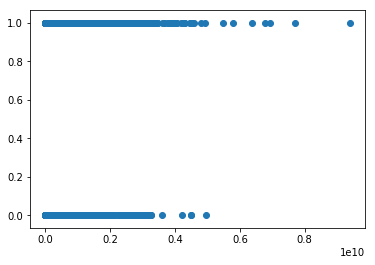

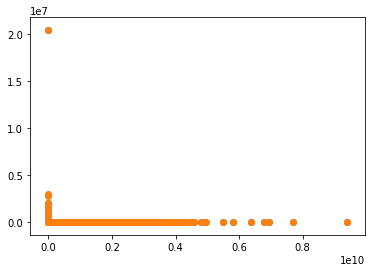

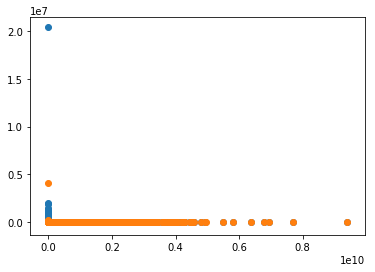

In [14]:
x=final_train.mextr_size_1.values
y=final_train.label.values
plt.scatter(x=x, y=y)
plt.show()
x=final_train.mextr_size_1.values
y=final_train.P.values
x1=final_train.mextr_size_1[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()
x=final_train.mextr_size_1.values
y=final_train.PT.values
x1=final_train.mextr_size_1[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()

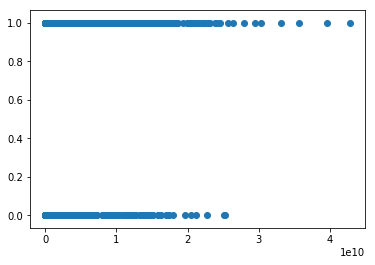

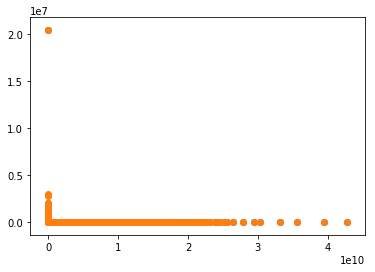

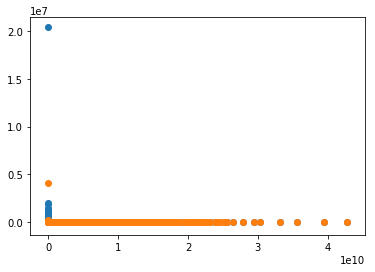

In [15]:
x=final_train.mextr_size_2.values
y=final_train.label.values
plt.scatter(x=x, y=y)
plt.show()
x=final_train.mextr_size_2.values
y=final_train.P.values
x1=final_train.mextr_size_2[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()
x=final_train.mextr_size_2.values
y=final_train.PT.values
x1=final_train.mextr_size_2[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()

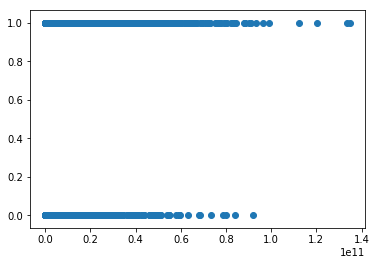

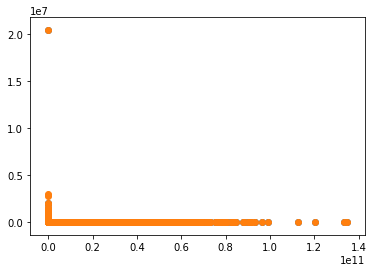

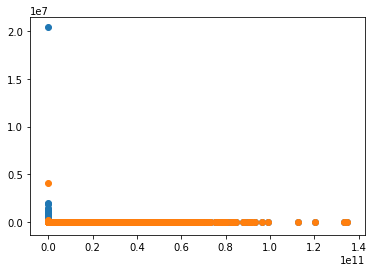

In [16]:
x=final_train.mextr_size_3.values
y=final_train.label.values
plt.scatter(x=x, y=y)
plt.show()
x=final_train.mextr_size_3.values
y=final_train.P.values
x1=final_train.mextr_size_3[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()
x=final_train.mextr_size_3.values
y=final_train.PT.values
x1=final_train.mextr_size_3[final_train.label==1].values
y1=final_train.P[final_train.label==1].values
plt.scatter(x=x1, y=y1)
plt.scatter(x=x, y=y)
plt.show()